<font size=7><p style="text-align: center;">Clustering</p></font>
<br>

### Contents<br>

1. [Introduction](#1)<br>
2. [Naive K-means Method](#2)<br>
    - [How does it work?](#2a)<br>
    - [Walk through an example](#2b)<br>
    - [Choosing optimal number of clusters](#2c)<br>
    - [Time complexity of this algorithm](#2d)<br>
    - [Problems with K-means clustering](#2e)<br>
3. [K-means++ Method](#3)<br>
    - [How does it work and What problem does it solve?](#3a)<br>
    - [Walk through an example](#3b)<br>
    - [Time complexity of this algorithm](#3c)<br>
    - [Is this algorithm good enough?](#3d)<br>
    - [Other methods](#3e)<br>
4. [Spectral Clustering](#4)<br>
    - [How does it work?](#4a)<br>
    - [Walk through an example](#4b)<br>
    - [Time complexity of this algorithm](#4c)<br>
    - [Limitations of spectral clustering](#4d)<br>
5. [DBSCAN Clustering](#5)<br>
    - [How does it work?](#5a)<br>
    - [Walk through an example](#5b)<br>
    - [Time Complexity](#5c)<br>
    - [Advantages and Limitations](#5d)<br>
5. [Summary](#6)<br>
6. [References](#8)<br>
7. [Algorithm Implementation](#7)<br>
    - [K-means/K-means++ clustering](#7a)<br>
    - [Spectral Clustering](#7b)<br>
    
<a id="1"></a>
<font size=6><p style="text-align: center;">Introduction</p></font>

<br>Clustering is a unsupervised machine learning technique of partitioning the data into a number of groups in such a way that the points or observations within a group are more similar to each other compared to the other groups. It is a part of Unsupervised learning because to perform clustering you do not need labeled data. The algorithm tries to find patterns, similarities and dissimilarities among data points and group them together.<br>
Applications of clustering ranges many fields, some of which are:
1. Image segmentation
2. Anomaly detection
3. Customer segmentation
4. Document clustering
5. Recommendation systems

In [169]:
from clustering import *
from sklearn import datasets
import matplotlib.pyplot as plt
from IPython.display import display, HTML

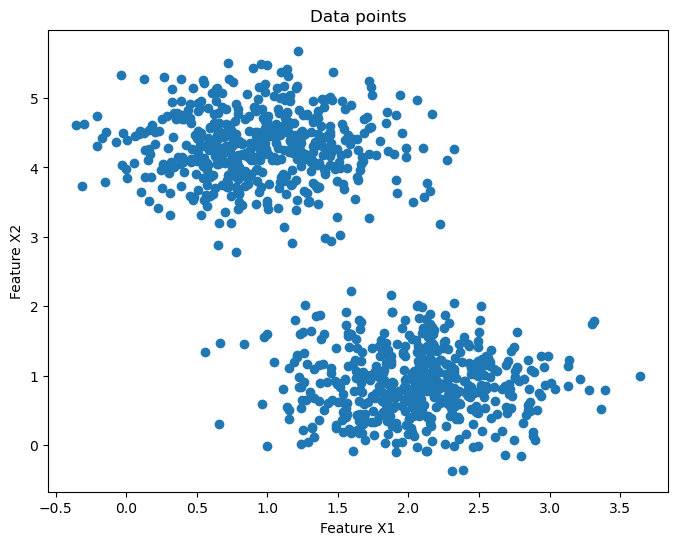

In [170]:
centers=2
X, y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, n_features=2,random_state=0)
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1])
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Data points')
plt.show()

Can you identify any similarity or differences amongs the points shown above? <br>
Visually it seems pretty clear that the points with high Feature X1 value and low Feature X2 value are similar to each other and the points with low Feature X1 and high Feature X2 value are similar to each other.

It is easier to visualize when we are dealing with low dimension. What if we had more features?

### How do we cluster them?
There are several methods to cluster the data based on the type of problem in hand, type of data, dimensionality of data, is the method scalable and will it suit the requirement, metrices that would best fit for the data in hand. Here is a list of clustering algorithms available on clustering with [sklearn](https://scikit-learn.org/stable/modules/clustering.html).
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/clustering_methods.png" style="display: block; margin: 0 auto" width=900 height=600/>

There are a lot of other methods available out there and have been implemented to address specific type of data or problem.
In this notebook, we will be cover 3 types of clustering algorithms:
1. Kmeans clustering
2. Kmeans++ clustering
3. Spectral clustering
4. DBSCAN clustering


<a id="2"></a>
<font size=6><p style="text-align: center;">Naive K-means</p></font><br>

According to [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering), the idea of k-means was initially proposed in 1956 by Hugo Steinhaus and a standard algorithm for this was proposed in 1957 by Stuart Loyd. Kmeans is based on the vector quantization method used in signal processing where multiple data points from a large continuous signal data can be grouped together and represented in a discreet fashion (converting analog to digital signal). <br>
In kmeans, the data is grouped into k clusters where each observation goes to the cluster with smallest distance to the centroid (nearest mean) of the cluster. The outcome of this is that the data region gets partitioned into regions, these regions are also called as Voronoi 
cells as shown in the figure below. The kmeans clustering tries to reduce the within cluster variances (or squared Euclidean distances). 
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/voronoi.png" alt="Voronoi Cells" style="display: block; margin: 0 auto" width=600 height=400/>

<a id="2a"></a>
### How does it work?
Kmeans is an iterative method that tries to find the optimal clusters and centroids. Steps in kmeans clustering:
1. Define k as number of clusters you want your data to be grouped into.
2. Choose k points at random from the data set and initialize them as centroids to cluster the data.
3. Generate k clusters from the centroids: Calculate distance from each point to all the centroid and for any point if the distance to centroid 'a' is less than centroid 'b' then the point gets assigned to the cluster with centroid 'a'.
4. Compute the new centroid for each cluster based on the point assignment.
5. Repeat steps 3-4 for n iterations or till the centroids aren't changing much.
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/clustering.gif" alt="Cluster" style="display: block; margin: 0 auto" width=700 height=600/>

<a id="2b"></a>
### Lets walk through an example
Below figure shows the data with 1000 points that seems to have 4 blobs or clusters spread with some variation in 2 dimension.

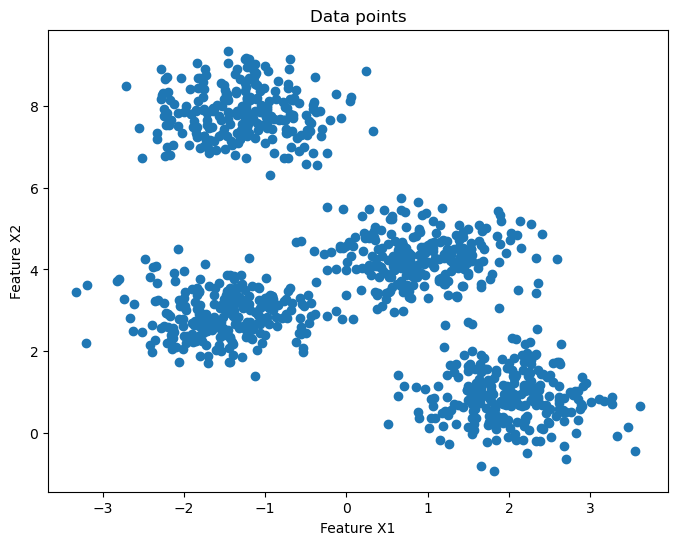

In [171]:
centers=4
X, y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.6, n_features=2,random_state=0)
fig, axs = plt.subplots(figsize=(8,6))
axs.scatter(X[:,0], X[:,1])
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Data points')
plt.show()

We first initialize our centroid points randomly. You can change the random_state to choose different set of random points. In my example I am keeping the random_state fixed to 47. In the figure below you can see the initial center points in red.

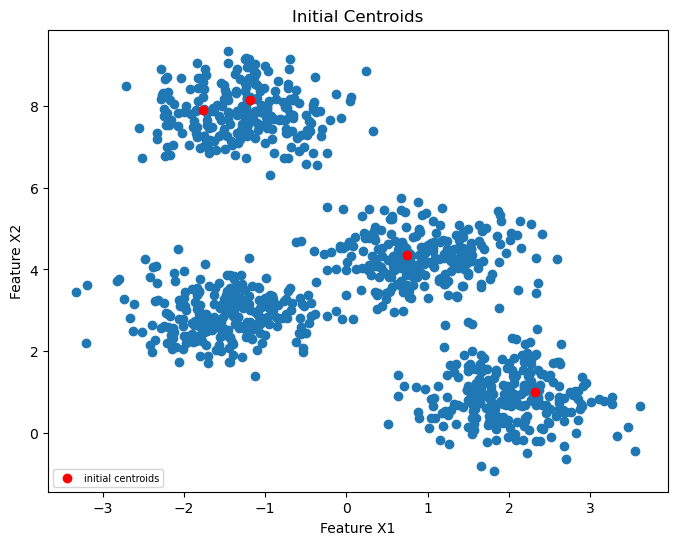

In [172]:
k=Kmeans(nclusters=centers, random_state=47)
center_init=k.init_centroids(X)
fig, axs = plt.subplots(figsize=(8,6))
axs.scatter(X[:, 0], X[:, 1])
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
plt.legend(loc='lower left', fontsize=7)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Initial Centroids')
plt.show()

Lets find cluster using clustering.kmeans class. (For implementation details check clustering.py or [Kmeans clustering](#7a))

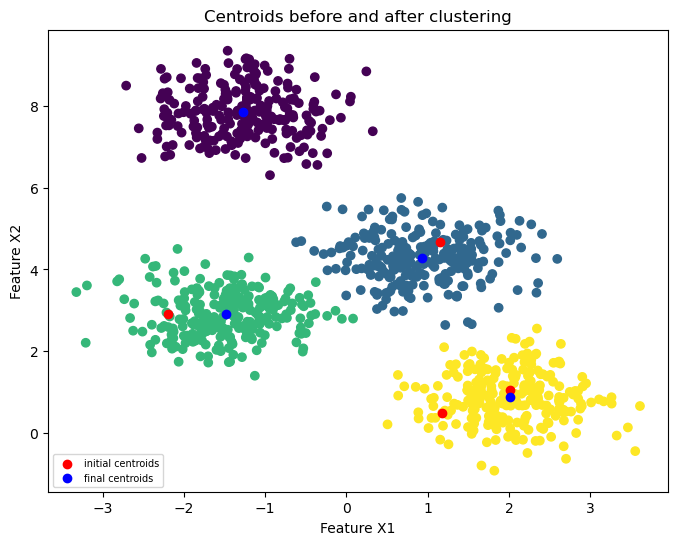

In [173]:
fig, axs = plt.subplots(figsize=(8,6))
k=Kmeans(nclusters=centers, random_state=2)
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left', fontsize=7)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Centroids before and after clustering')
plt.show()

Red points represent the initial centroids chosen and blue points represent the final centroid points after fitting. The figure shows how due to the centroids the algorithm was able to find the closest points to the centroid and group them together. Here is a gif from [medium](https://medium.com/analytics-vidhya/k-means-algorithm-to-recognize-grayscale-6c9896e3c65f) on how clusters move from initial centroid to the final centroid position over the iterations.
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/cluster_centroid.gif" width=600 height=500/>

<a id="2c"></a>
### How do we choose optimal number of clusters?
It is easy to define number of clusters and ask the algorithm to do the magic to get the clusters but many times you don't know how many clusters you should go for. There are some methods to find the optimal number of clusters, of these 2 major methods are:
1. Elbow method
2. Silhouette method

#### 1. Elbow method:
In this method, we plot the within cluster sum of squares (WSS) against the number of clusters. The WSS is the sum of the squared distances between each point and its cluster centroid. The idea is to choose the number of clusters at which the reduction in WSS begins to go off or where it jumps the most forming a shape like elbow. The optimal number of clusters should explain most of the variation in the data at the same time keeping the number of clusters as low as possible.
Lets check how many clusters should we use for the above example.

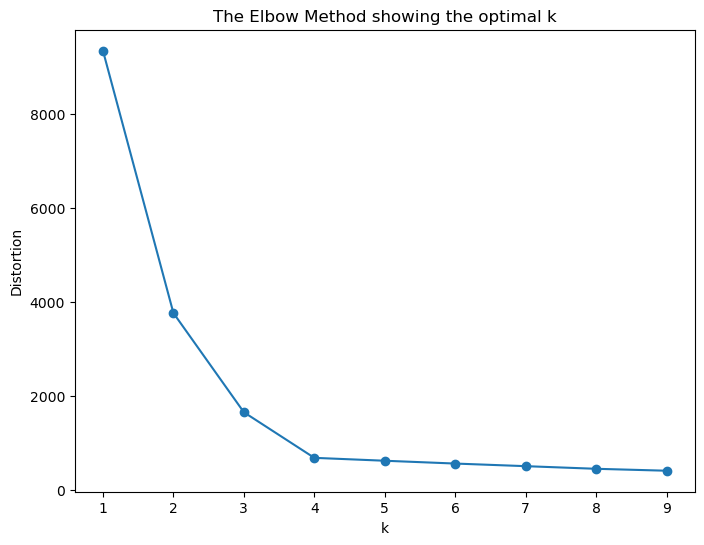

In [174]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit_predict(X)
    distortions.append(kmeanModel.inertia_)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(K, distortions, '-o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

It is clear from the elbow plot that there is huge jump at 4 and it tapers after that. Therefore, we should go for 4 clusters to partition this dataset.

#### 2. Silhouette Method
In this method, we calculate average distance between points in the same cluster (intra-cluster distance) and the average distance between points in different clusters (inter-cluster distance). Following this we calculate silhouette score. The silhouette score is a value between -1 and 1 that measures how similar a data point is to its own cluster compared to other clusters, a high score implies better clustering. We calculate this for k clusters and choose the k with highest slihouette score.<br>
Silhouette score, S, for each sample is calculated using the following formula:<br>
$$ S={{(𝑏–𝑎)}\over{𝑚𝑎𝑥(𝑎,𝑏)}}$$


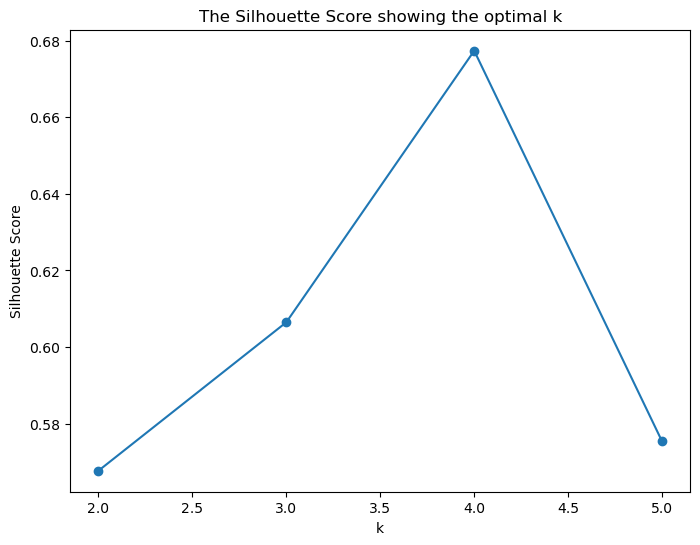

In [175]:
from sklearn.metrics import silhouette_score
fig, ax = plt.subplots(figsize=(8,6))
K=range(2,6)
score=[]
for i in K:
    k = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    k.fit_predict(X)
    q, mod = divmod(i, 2)
    score.append(silhouette_score(X, k.labels_, metric='euclidean'))
ax.plot(K,score,'-o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Score showing the optimal k')
plt.show()

It is clear from the above plot that the highest silhouette score is when the number of clusters are 4. So choosing 4 clusters to cluster this data would be the better than choosing a lower or higher number of clusters.

<a id="2d"></a>
### Time Complexity of Kmeans Algorithm
The time complexity of kmenas algorithm depends on number of data points (n), number of clusters (k), number of iterations (i) and number of dimensions (d). Steps in kmeans:
1. Centroid initialization for k clusters, since here it is random initialization, it doesn't taken more time.
2. Assign each data point to its closest centroid (using a distance metric such as Euclidean distance). This step takes O(k * n * d) time
3. Recalculate the centroid based on new data points for each cluster. For this step time complexity is O(k * d)
4. Repeat steps 2 and 3 till convergence or i times. This combines the above two steps and hence has overall time complexity of O(i * k * n * d)
Step 2 takes the most time here in calculating distance of each data point from the cluster and its iterated i times and hence, complexity of this algorithm comes out to be O(n * i * k * d).<br>
Kmeans is generally efficient but for large datasets as well as for very high dimensional data, it can be very slow and memory intensive.

<a id="2e"></a>
### Problems with Kmeans clustering
The main issues with the k-means clustering algorithm is that it can get trapped in local optima, which means that the quality of the clustering results depends heavily on the initial placement of the centroids. This is because k-means algorithm randomly selects initial centroids, and different random selections can lead to different results.
Here is an example showing initial and final centroids where clustering doesn't happen as per the expectation due to random initialization of centroids.


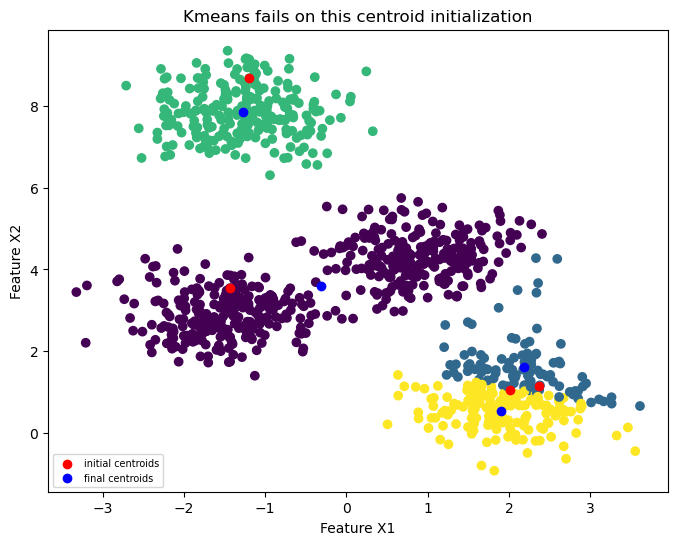

In [176]:
fig, axs = plt.subplots(figsize=(8,6))
k=Kmeans(nclusters=centers, random_state=10)
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left', fontsize=7)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Kmeans fails on this centroid initialization')
plt.show()

If the initial centroids are selected poorly, the algorithm may converge to a suboptimal solution, where the clustering results are not meaningful or useful. To overcome this issue, many techniques can be used to improve the initial centroid selection, like:
1. K-means++ initialization
2. Multiple random initializations
3. Hierarchical clustering initialization

Lets discuss how k-means++ works and helps over come this issue

<a id="3"></a>
<font size=6><p style="text-align: center;">K-means++</p></font><br>

<a id="3a"></a>
### How does kmeans++ initialization prevents such clusters?
Kmeans++ initialization selects initial centroids away from each other such that the clustering algorithm does not get stuck in local optima. The algorithm works as follows:

1. Choose the first centroid at random from the data points.
2. For each remaining data point, compute the distance between the points and the nearest centroid that has already been chosen and find that minimum.
3. Among the minimum distances to a cluster for each point, find the maximum distance. and choose that point as next centroid.
4. Repeat steps 2 and 3 until all k centroids have been chosen.

<a id="3b"></a>
### Lets check how the kmeans++ clustering helps with the above issue
On the same data we use clustering.kmeans_pp fit_predict method. (For implementation details check clustering.py or [Kmeans++ clustering](#7a))

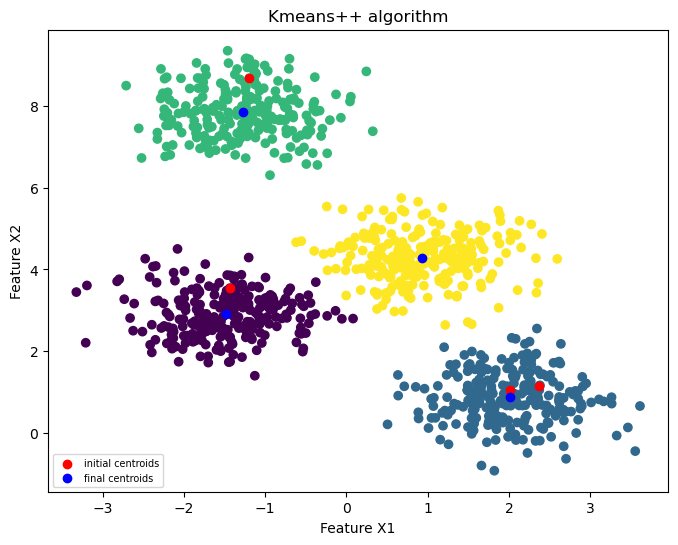

In [177]:
fig, axs = plt.subplots(figsize=(8,6))
k=Kmeans(nclusters=centers, random_state=10, init_method='kpp')
y_pred = k.fit_predict(X)
center_init, final_centroid = k.return_centroids(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
axs.scatter(center_init[:,0], center_init[:,1], color='red', label='initial centroids')
axs.scatter(final_centroid[:,0], final_centroid[:,1], color='blue', label='final centroids')
plt.legend(loc='lower left', fontsize=7)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Kmeans++ algorithm')
plt.show()

As it is clear the initial points chosen are very far from each other avoiding the problem of getting stuck in the local optima. At the end, it easily identifies the right centroids and hence right clusters.

<a id="3c"></a>
### Time complexity of K-means++
The time complexity of kmeans++ should be same as kmeans since there is only one difference in centroid initialization. But, because of the way we initialize our data points, the algorithm doesn't take i iterations (given i is large) and is guaranteed to converge in log(n) time and therefore the time complexity of kmeans++ algorithm is slightly better than kmeans and is given by O(n * k * d * log(n)). 

<a id="3d"></a>
### Is this algorithm good enough?
It has been shown that k-means++ outperforms other initialization methods, such as random initialization, in terms of clustering accuracy and time taken to converge. However, it is important to note that k-means++ may not always be the best choice for all datasets or clustering tasks, and other initialization methods or clustering algorithms may be more appropriate depending on the specific problem at hand. Few examples where kmeans++ may not be best choice:
1. Non-convex clusters: k-means++ is designed to work with convex clusters (clusters that are roughly spherical or elliptical in shape). If the clusters in the data are non-convex, k-means++ may fail to separate them properly and may group together points from different clusters.
2. Imbalanced clusters: If the data points in each cluster are significantly imbalanced, k-means++ may not be able to identify the correct number of clusters or may group together points from different clusters.
3. Outliers: k-means++ is sensitive to outliers. Outliers can make the centroids to be placed in suboptimal locations leading to poor clustering results.
4. High-dimensional data: k-means++ can struggle with high-dimensional data, as the distance metric used in the algorithm can become less meaningful and lead to poor clustering results.

#### Lets look at one of the example that fails to cluster right with kmeans++

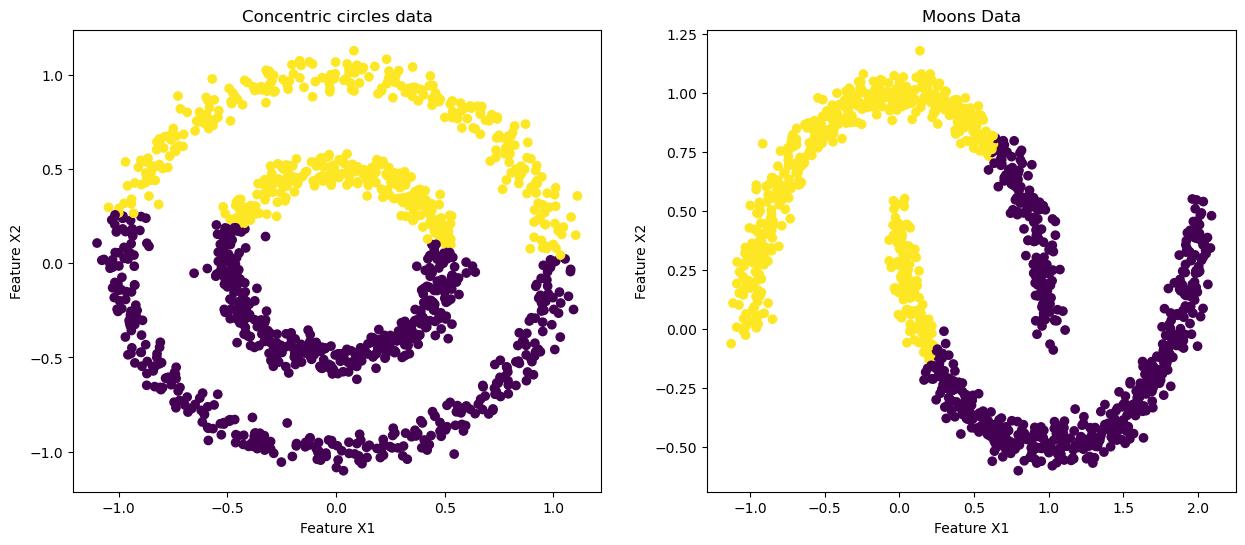

In [178]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
X0 , y0 = datasets.make_circles(n_samples=1200, factor=0.5, noise=0.05)
X1 , y1 = datasets.make_moons(n_samples=1200, noise=0.05)
X = [ X0, X1 ]
titles = ['Concentric circles data', 'Moons Data']
for i in range(len(X)):
    k = Kmeans(nclusters=2, random_state=2, init_method='kpp')
    y_pred = k.fit_predict(X[i])
    axs[i].scatter(X[i][:, 0], X[i][:, 1], c=y_pred)
    axs[i].set_xlabel('Feature X1')
    axs[i].set_ylabel('Feature X2')
    axs[i].set_title(titles[i])
plt.show()

<a id="3e"></a>
### Are there other methods that can handle this data better?
There are several methods that can be used to handle non-convex clustering problems with k-means++. Some of these methods are:
1. Spectral clustering: Its a clustering technique that can handle non-convex clusters. It works by transforming the data into a new space using the graph Laplacian, and then clustering the transformed data using k-means or another clustering algorithm.
2. Hierarchical clustering: Its a clustering technique that builds a tree-like structure of nested clusters. It can handle non-convex clusters by recursively splitting clusters into smaller subclusters based on the number of clusters specified.
3. Density-based clustering: Techniques like DBSCAN and OPTICS are density based clustering methods that can handle non-convex clusters by identifying areas of high density in the data and clustering points within those areas. They do not depend on a specified number of clusters, and can identify clusters of random shape or data cloud.

Lets focus on spectral clustering and see how it works.

<a id="4"></a>
<font size=6><p style="text-align: center;">Spectral Clustering</p></font><br>

Spectral clustering uses graph structure of data that may not be convex in nature or well separated in feature space. It works on the similarity matrix of the data points and projects it on lower dimension using eigen values and vectors (called spectrum) making it easier and effective for the algorithm to identify the clusters in this space. Spectral clustering are generally useful for datasets with complex or non-linear relationships between the data points.
Here is simple gif from [towards data science](https://towardsdatascience.com/spectral-clustering-aba2640c0d5b) showing how the nearest neighbor method is used to generate the similarity matrix and how their eigen value changes. These connections between the points are used to finally split into clusters based on the number of clusters provided.
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/spectral_graph.gif" style="display: block; margin: 0 auto" width=800 height=700/>

<a id="4a"></a>
### How does it work?
1. Start by constructing a similarity matrix that shows the similarity of each point in the set with all the other points. This can be done using different measures like cosine similarity, gaussian kernel similarity, euclidean distance, manhattan distance, haversine similarity etc. We can create similarity or affinity matrix using k-nearest neighbor graph approach or using rbf (radial basis function) kernel.
2. Now compute the laplacian or graph laplacian matrix that summarizes the graph structure of the similarity matrix. We generally use normalized graph Laplacian. The normalized graph Laplacian is defined as L = S - D^(-1/2) W D^(-1/2), where W is the similarity matrix, D is the diagonal matrix of node degrees, and S is the identity matrix.
3. Compute eigenvectors and eigenvalues of the Laplacian matrix using eigen value decomposition technique.
4. From the eigenvalues and eigenvectors we project the data to lower dimension which is then used or passed to normal k-means clustering or other clustering method.

<a id="4b"></a>
### Lets walk through an example

#### Method 1: Radial basis kernel
In this method the similarity matrix is calculated using radial basis kernel which is then used to create normalized laplacian and eigen vectors that are passed to kmeans algorithm. We use clustering.SpecClustering fit_predict method with affinity as 'rbf'. (For implementation details check clustering.py or [Spectral clustering](#7b))

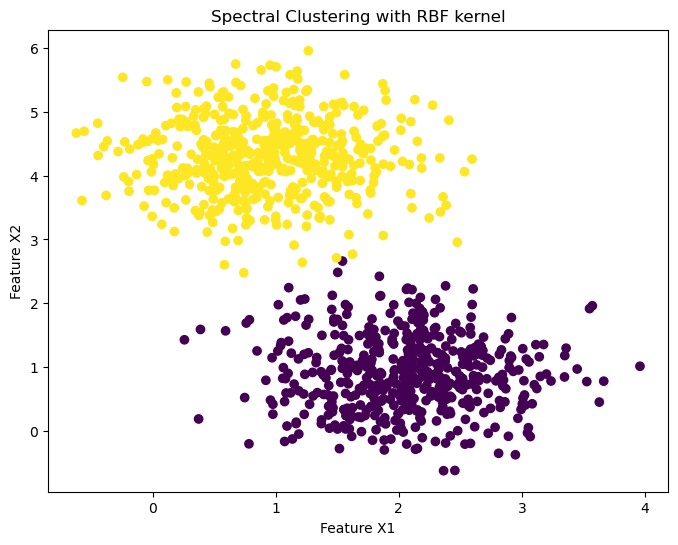

In [179]:
centers = 2
X, y = datasets.make_blobs(n_samples=1000, centers=centers, cluster_std=0.6, n_features=2,random_state=0)
fig, axs = plt.subplots(figsize=(8,6))
k = SpecCluster(nclusters=centers, affinity='rbf')
y_pred = k.fit_predict(X)
axs.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Spectral Clustering with RBF kernel')
plt.show()

Does it work always?
Lets see the example mentioned in limitations of kmeans++, we use clustering.SpecClustering fit_predict method with affinity 'rbf'. (For any implementation details check clustering.py or [Spectral clustering](#7b))

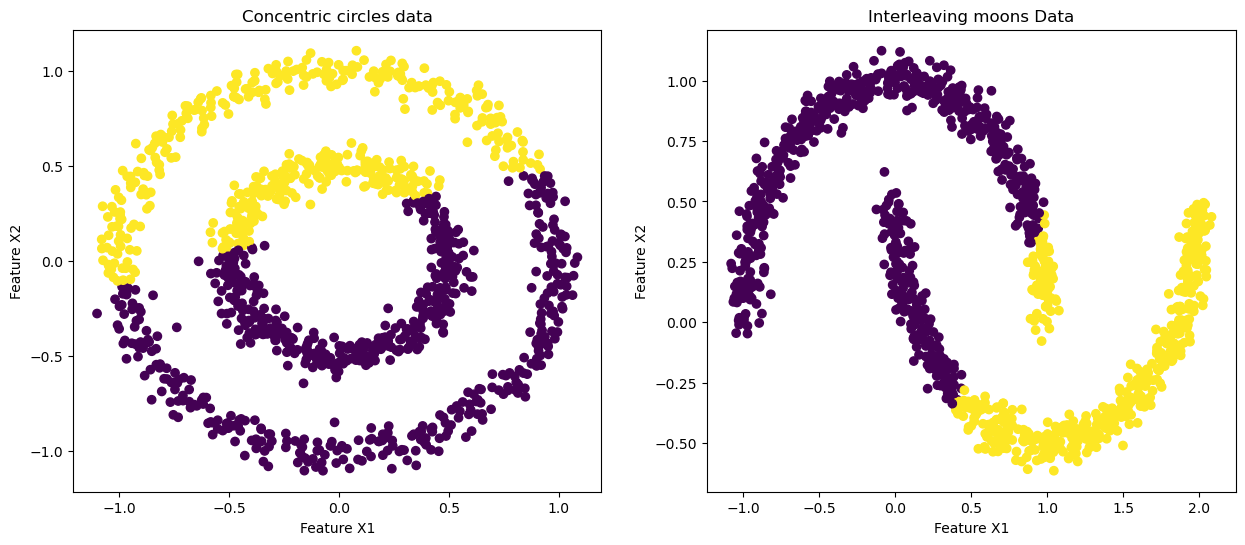

In [180]:
# check how the spectral clustering helps with the non convex clustering issue
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
X0 , y0 = datasets.make_circles(n_samples=1200, factor=0.5, noise=0.05)
X1 , y1 = datasets.make_moons(n_samples=1200, noise=0.05)
X = [ X0, X1 ]
titles = ['Concentric circles data', 'Interleaving moons Data']
for i in range(len(X)):
    k = SpecCluster(nclusters=2, affinity='rbf')
    y_pred = k.fit_predict(X[i])
    axs[i].scatter(X[i][:, 0], X[i][:, 1], c=y_pred)
    axs[i].set_xlabel('Feature X1')
    axs[i].set_ylabel('Feature X2')
    axs[i].set_title(titles[i])
plt.show()

It seems to work a little better than kmeans algorithm on interleaving moons data but not good enough. The nearest neighbor method to generate similarity matrix seem to work better on the example.

#### Method 2: Nearest Neighbors
This method uses nearest neighbors graph to generate the similarity matrix in place of rbf kernel. All the other steps remain same.
Lets see if this method can do better clustering on this data set. We will use clustering.SpecClustering fit_predict method with affinity 'nearest_neighbors'. (For any implementation details check clustering.py or [Spectral clustering](#6b))

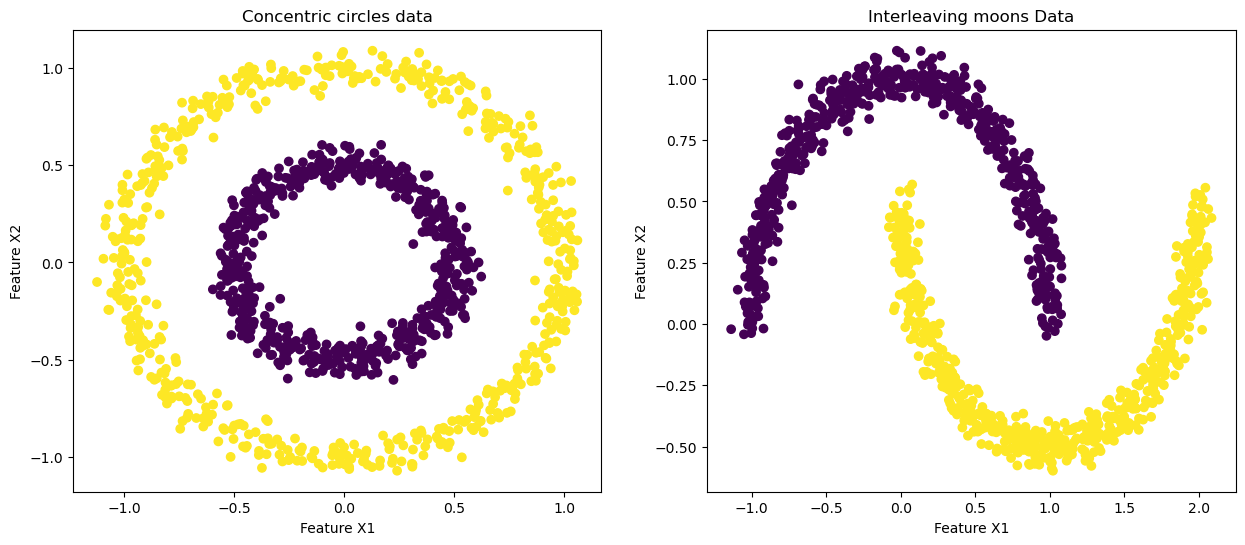

In [181]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
X0 , y0 = datasets.make_circles(n_samples=1200, factor=0.5, noise=0.05)
X1 , y1 = datasets.make_moons(n_samples=1200, noise=0.05)
X = [ X0, X1 ]
titles = ['Concentric circles data', 'Interleaving moons Data']
for i in range(len(X)):
    k = SpecCluster(nclusters=2, affinity='nearest_neighbors')
    y_pred = k.fit_predict(X[i])
    axs[i].scatter(X[i][:, 0], X[i][:, 1], c=y_pred)
    axs[i].set_xlabel('Feature X1')
    axs[i].set_ylabel('Feature X2')
    axs[i].set_title(titles[i])
plt.show()

From the plots, it is clear that the nearest neighbor method works better with such data and can better cluster the points.

<a id="4c"></a>
### Time complexity of Spectral clustering method
The time complexity of spectral clustering depends on several factors like the number of data points, the number of clusters, and the method used to compute the eigenvectors of the laplacian matrix. Steps in this methods:
1. Similarity matrix generation which takes O(n^2 * d) time
2. Laplacian matrix calculation also takes O(n^2) runtime
3. Dimensionality reduction or calculating eigenvalues and eigen vectors of laplacian matrix. This step is very computationally expensive and has time complexity generally O(n^3). This also dependson the method used to compute eigen value decomposition. The fastest method to compute this decomposition takes O(n^2.3737)
4. Perform Kmeans which takes O(n*k*d)
Since the major step is eigen value decomposition, the overall time complexity is O(n^3). Hence, when working on very large dataset, this mmethod can be very slow. There are methods that take relatively low time and space like hierarchical clustering and density based clustering. <br>

<a id="4d"></a>
### Limitations of Spectral Clustering
1. Spectral clustering is sensitive to parameter tuning such as number of clusters, similarity matrix. These parameters should be arefully selected and based on their values clusters may differ a lot and can even be inaccurate.
2. Scalability is the major challenege with spectral clustering because it is computationally expensive when the number of data points is large. The eigenvalue decomposition required for this algorithm has a time complexity of O(n^3), which can be restrictive for large datasets.
3. May not work well on sparse dataset, the implementation internally assumes that the points within a cluster are closely connected or in close proximity.
4. Depends on the similarity measure used for similarity matrix construction. As we have seen, if similarity matrix is not appropriate it may not work well.
5. Since we transform the data to different dimension, the method is less interpretable.

For many of these methods it is difficult to find the number of clusters that the data should be divided into, sometimes even using the cluster selection methods. There are methods that do not require you to provide specific number of clusters, one of these methods is DBSCAN clustering.

<a id="5"></a>
<font size=6><p style="text-align: center;">DBSCAN Clustering</p></font><br>
DBSCAN (or Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm which combines together points close to each other in high-density regions and sparse in low-density regions. The algorithm is particularly useful when dealing with datasets that have arbitrary shapes, different densities, and noisy data points.
<br><br><br><img src="/Users/itysoni/MSDS/DSA/hw/hw2/images/dbscan.gif" style="display: block; margin: 0 auto" width=800 height=700/>

<a id="5a"></a>
### How does it work?
DBSCAN first defines a distance measure like euclidean distance and two parameters: epsilon (ε) and minPts. Epsilon is the radius of the neighborhood around each point and minPts defines the minimum number of points required to create a dense region.
Algorithm:
1. It randomly selects a point find all of the points within its epsilon radius neighborhood. 
2. If the number of points in neighborhood is greater than or equal to the minPts, then a new region is formed by considering a randomly selected unvisited point. 
3. All points within the region are assigned to the same cluster. 
4. Repeats the process for all unvisited points until all points are assigned to a cluster or labeled as noise.



<a id="5b"></a>
### Walk through an example
Lets see how does this algorithm performs on same dataset. Here, I am using the DBSCAN library available with sklearn.

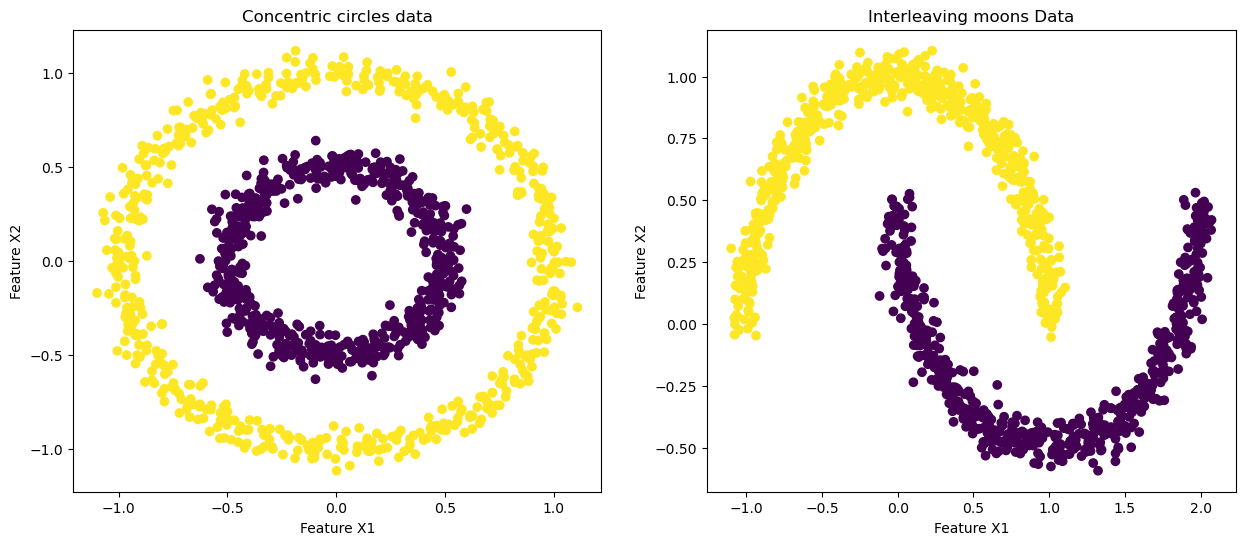

In [182]:
from sklearn.cluster import DBSCAN
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
X0 , y0 = datasets.make_circles(n_samples=1200, factor=0.5, noise=0.05)
X1 , y1 = datasets.make_moons(n_samples=1200, noise=0.05)
X = [ X0, X1 ]
titles = ['Concentric circles data', 'Interleaving moons Data']
for i in range(len(X)):
    k = DBSCAN(0.15)
    y_pred = k.fit_predict(X[i])
    axs[i].scatter(X[i][:, 0], X[i][:, 1], c=y_pred)
    axs[i].set_xlabel('Feature X1')
    axs[i].set_ylabel('Feature X2')
    axs[i].set_title(titles[i])
plt.show()

<a id="5c"></a>
### Time Complexity of DBSCAN
The time complexity of the DBSCAN algorithm can be expressed as O(n log n) or O(n^2) where n is number of data points, depending on the implementation and the input data. The worst case time complexity is O(n^2)

<a id="5d"></a>
### Advantages and Limitations of DBSCAN
#### Advantages
1. It can automatically determine the number of clusters in a dataset.
2. It can handle noise points or outliers that don't belong to any clusters.

#### Limitations
1. It can be sensitive to the parameters epsilon (ε) and minPts
2. It may not work well on datasets with varying densities. 
3. It may also not be suitable for high-dimensional datasets.

<a id="6"></a>
<font size=6><p style="text-align: center;">Summary</p></font><br>
Clustering is a powerful technique to identify patterns and categorize data. This is very useful when you do not have labeled data. Depending on the type of data that is available, different clustering techniques should be used as discussed in various examples. Clustering has a wide variety of applications like image segmentation, document clustering, and customer segmentation etc.
There is a lot more to clustering techniques but this notebook only limits to the three methods discussed.

<a id="8"></a>
<font size=6><p style="text-align: center;">References</p></font><br>
https://github.com/parrt/msds689/blob/master/projects/kmeans/kmeans.md<br>
https://scikit-learn.org/stable/modules/clustering.html<br>
https://www.linkedin.com/pulse/k-means-clustering-its-real-use-case-surayya-shaikh<br>
https://medium.com/@imparth/k-means-clustering-algorithm-34807a7cec71<br>
https://en.wikipedia.org/wiki/K-means_clustering<br>
https://en.wikipedia.org/wiki/Spectral_clustering<br>
https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556<br>
https://towardsdatascience.com/spectral-clustering-aba2640c0d5b<br>
https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html<br>
https://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf<br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py<br>
https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/<br>
https://en.wikipedia.org/wiki/DBSCAN<br>

<a id="7"></a>
<font size=6><p style="text-align: center;">Algorithm Implementation</p></font><br>

<details>
<a id="7a"></a>
<summary>K-Means/K-means++ Clustering</summary>
<pre>
class Kmeans:
    def __init__(self, nclusters=2, random_state=47, tolerance=0.1, iterations=10, init_method='random'):
        """
        Initializes a new instance of KMeans.
        :param nclusters: number of clusters. Defaults to 2. Type: int
        :param random_state: random_state used to select centroid at random for kmeans. Defaults to 47. Type: int
        :param tolerance: criteria to stop when new centroid changes by more than this value. Defaults to 0.1. Type: float
        :param iterations: Number of iterations before stopping. Defaults to 10. Type: int
        :param init_method: 'random' implies kmeans or random initialization, 'kpp' implies 'kmeans++' method of centroid initialization. Defaults to 'random'. Type: str
        """
        self.nclusters=nclusters
        self.random_state=random_state
        self.tolerance=tolerance
        self.iterations=iterations
        self.final_centroids=None
        self.init_method=init_method
    
    def init_centroids(self, data):
        len_data=len(data)
        r = np.random.RandomState(self.random_state)
        rand_idx=r.choice(len_data, self.nclusters)
        centroids=data[rand_idx]
        return centroids

    def init_centroids_kpp(self, data):
        len_data=len(data)
        idxs=[]
        r = np.random.RandomState(self.random_state)
        rand_idx=r.choice(len_data, 1)
        c1=data[rand_idx]
        idxs.append(rand_idx[0])
        for c in range(self.nclusters-1):
            dist=self.calc_distance(data,c1)
            if c==0:
                dists=dist.reshape((dist.shape[0],1))
                rand_idx=np.argmax(dists)
            else:
                dists=np.append(dists,dist.reshape(dist.shape[0],1),axis=1)
                rand_idx=np.argmax(np.min(dists,axis=1))
            c1=data[rand_idx]
            idxs.append(rand_idx)
        centroids=data[idxs]
        return centroids

    def calc_distance(self, X, Y):
        dist=np.sqrt(np.sum((X - Y)**2,axis=1))
        return dist

    def create_clusters(self, data, centroids):
        cluster=np.zeros((data.shape[0],))
        for pt_idx, point in enumerate(data):
            mini,minv=0,np.inf
            for idx, centroid in enumerate(centroids):
                dist=np.sqrt(np.sum((point - centroid)**2))
                if dist<minv:
                    minv=dist
                    mini=idx
            cluster[pt_idx]=mini
        return cluster

    def calculate_centroids(self, data, clusters):
        centroids=np.zeros((self.nclusters,data.shape[1]))
        for centroid in range(self.nclusters):
            d_c=data[np.where(clusters==centroid)]
            centroids[centroid]=np.mean(d_c,axis=0)
        return centroids

    def fit_predict(self, data):
        data = np.array(data)
        if self.init_method=='kpp':
            prev_centroids = self.init_centroids_kpp(data)
        else:
            prev_centroids = self.init_centroids(data)
        for itr in range(self.iterations):
            clusters=self.create_clusters(data, prev_centroids)
            centroids=self.calculate_centroids(data,clusters)
            dists=self.calc_distance(prev_centroids,centroids)
            high_dist=np.where(dists>self.tolerance)
            # display(X, centroids, clusters)
            if high_dist[0].any():
                prev_centroids=centroids
            else:
                break
        self.final_centroids=centroids
        return clusters

    def return_centroids(self, data):
        data = np.array(data)
        return self.init_centroids(data), self.final_centroids
</pre>
</details>

<details>
<a id="7b"></a>
<summary>Spectral Clustering</summary>
<pre>
class SpecCluster:
    def __init__(self, nclusters=2, nneighbors=10, gamma=2.0, var=1, affinity='rbf'):
        self.nclusters = nclusters
        self.nneighbors = nneighbors
        self.gamma = gamma
        self.var = var
        self.affinity = affinity
    
    def fit(self, X):
        ### Compute affinity matrix based on the affinity method
        if self.affinity == 'nearest_neighbors':
            W = kneighbors_graph(X, n_neighbors=self.nneighbors, mode='connectivity')
            W = 0.5 * (W + W.T)
        elif self.affinity == 'rbf' :
            W = self.var * rbf_kernel(X, gamma = self.gamma)
        ### Compute diagonal matrix of affinity matrix
        D = np.diag(np.ravel(np.sum(W, axis=1)))
        ### Calculate laplacian matrix
        L = D - W
        ### Calculate eigen values or vectors of the affinity matrix
        eigvals, eigvecs = eigs(L, k=self.nclusters, which='SM')
        eigvecs = eigvecs[:, 1:]
        eigvecs = np.real(eigvecs)
        ### Perform kmeans clustering on eigen vectors
        kmean = Kmeans(nclusters=self.nclusters, init_method='kpp', random_state=11)
        self.labels_ = kmean.fit_predict(eigvecs)
        self.cluster_centers_ = kmean.return_centroids(eigvecs)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_
</pre>
</details>